# 1. Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
#!pip install xgboost
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics

In [2]:
ls

Algerian_forest_fires_dataset_UPDATE.csv
EDA.csv
EDA.ipynb
Feature_Engineering.csv
Feature_Engineering.ipynb
Feature_Selection.csv
Feature_Selection.ipynb
LICENSE
README.md
Regression_Model_Selection.ipynb


# 2. Importing Dataset

In [3]:
data=pd.read_csv("Feature_Selection.csv")
df=data.copy()
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,day,month,year,Classes
0,-0.874735,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925,-0.894576,1.0,6.0,2012.0,0.0
1,-0.874735,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774,-0.908340,2.0,6.0,2012.0,0.0
2,-1.702005,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089,-0.949629,3.0,6.0,2012.0,0.0
3,-1.977761,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937,-0.963392,4.0,6.0,2012.0,0.0
4,-1.426248,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542,-0.894576,5.0,6.0,2012.0,0.0


# 3. Train Test Split

In [4]:
df.drop(['day','month','year','Classes'], axis=1, inplace=True)
X = df.drop('FWI',axis=1)
y= df['FWI']

In [5]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((195, 8), (49, 8))

# 4. Regressor Model Build

In [6]:
#Regression model
regressors =   [LinearRegression(), 
               Lasso(),
               Ridge(), 
               ElasticNet(),
               SVR(),
               KNeighborsRegressor(),
               DecisionTreeRegressor(),
               RandomForestRegressor(),
               AdaBoostRegressor(),
               XGBRegressor()]

In [7]:
for model in regressors:
    model.fit(X_train, y_train)
    print(model,': trained')

LinearRegression() : trained
Lasso() : trained
Ridge() : trained
ElasticNet() : trained
SVR() : trained
KNeighborsRegressor() : trained
DecisionTreeRegressor() : trained
RandomForestRegressor() : trained
AdaBoostRegressor() : trained
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) : trained


In [8]:
# Model Evaluation
# creating lists of varios scores
mae =[]
r2 =[]
trainset_accuracy = []
testset_accuracy = []

for model in regressors:
    #print(model)
    model.fit(X_train, y_train)
    #pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    mae_score = mean_absolute_error(y_test, pred_test)
    r2_value = r2_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    
    #Appending scores
    mae.append(mae_score)
    r2.append(r2_value)
   
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [9]:
# initialise data of lists.
data = {'MAE':mae,
'r2_score':r2,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["LinearRegression","Lasso","Ridge","ElasticNet","SVR",
             "KNeighborsRegressor","DecisionTreeRegressor",'RandomForestRegressor',
            "AdaBoostRegressor","XGBRegressor"])


In [10]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,MAE,r2_score,Accuracy on Testset,Accuracy on Trainset
LinearRegression,0.073232,0.972315,0.972315,0.977872
Lasso,0.742351,-0.044135,-0.044135,0.000000
Ridge,0.073381,0.971762,0.971762,0.977822
ElasticNet,0.476139,0.561923,0.561923,0.591135
SVR,0.099269,0.941164,0.941164,0.989219
KNeighborsRegressor,0.126958,0.936130,0.936130,0.976884
DecisionTreeRegressor,0.096342,0.975822,0.975822,1.000000
RandomForestRegressor,0.079817,0.975934,0.975934,0.997053
AdaBoostRegressor,0.178461,0.934368,0.934368,0.981691
XGBRegressor,0.074775,0.975187,0.975187,0.999999


In [11]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)

train_accuracy = model.score(X_train,y_train)
test_accuracy = model.score(X_test,y_test)
print("Lasso Regression:")
print("Train Accuracy: ",train_accuracy)
print("Test Accuracy: ",test_accuracy)
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Lasso Regression:
Train Accuracy:  0.9999988737314045
Test Accuracy:  0.975187214439413
R2 Score value: -0.0441
MAE value: 0.7424


# 5. Hyper-Parameter Tuning

## 5.1 Random Forest Regressor

In [14]:
parameters =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

random_forest = RandomForestRegressor()
Random_forest_reg = RandomizedSearchCV(random_forest,parameters, cv = 10, verbose=2,n_jobs = -1)
Random_forest_reg.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [22]:
best_random_grid=Random_forest_reg.best_estimator_

bestrf_pred = best_random_grid.predict(X_test)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)

train_accuracy = Random_forest_reg.score(X_train,y_train)
test_accuracy = Random_forest_reg.score(X_test,y_test)
print("Random Forest Results After Tuned: ")
print()
print("Train Accuracy: ",train_accuracy)
print("Test Accuracy: ",test_accuracy)

print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Results After Tuned: 

Train Accuracy:  1.0
Test Accuracy:  0.9812507038344196
R2 Score value: 0.9813
MAE value: 0.0736


# 5.2 Feature removal

In [23]:
feature_importances = Random_forest_reg.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
7,ISI,0.360493
4,FFMC,0.196279
5,DMC,0.191922
6,DC,0.100044
3,Rain,0.063114
1,RH,0.049575
0,Temperature,0.029202
2,Ws,0.009371


Text(0, 0.5, 'Features')

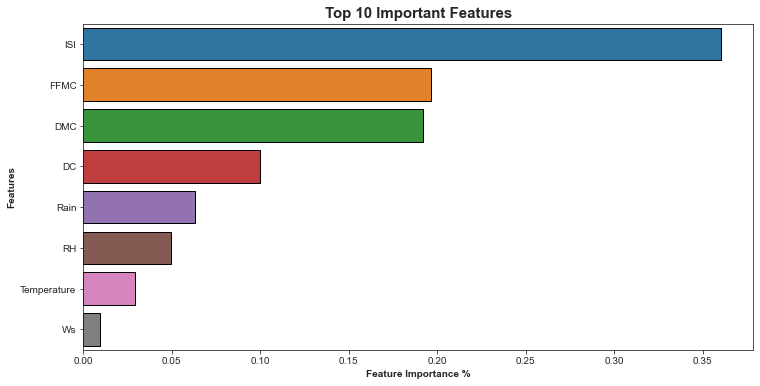

In [24]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

In [ ]:
import pickle
file = bz2.BZ2File('regression.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()